# Classic text representation techniques

This notebook presents the most typical representation techniques that have been used in natural language processing. These representations are motivated by probability and have traditionally been used as a baseline for text representation. This representation allows us to address common tasks in NLP such as information retrieval, text generation, autocompletion, text classification, topic modeling, among others.


## Bag of Words

The bag-of-words (BoW) is the simplest representation to use. It can be easily calculated for different texts and allows computational calculations to be parallelized, which is useful for large text datasets.

# Classic text representation techniques

<img src="https://miro.medium.com/max/1134/1*lhH8dFbK5_saNe4kcWXwiA.png" width=500>


The formal definition of BoW assumes that there is a finite set of words or vocabulary $\mathcal{V} = \{w_1, w_2, \dots, w_m\}$ and that we have a corpus of $N$ documents $\mathbf{d}_i=[w_a, w_b, \dots, w_d]$ composed of ordered words from the vocabulary $\mathcal{V}$.

Therefore, the BoW representation can be calculated as the categorical distribution of words in a single document $P(w_j|d_i)$, as shown in the following equation:

$$
P(w_j|d_i) \propto \#(w_j \in d_i)\\
P(w_j|d_i) = \frac{\#(w_j \in d_i)}{|d_i|}
$$

This corresponds to the normalized number of occurrences of each word in the document.

For practical examples, we will import some necessary libraries:


In [28]:
# Import necessary libraries
import numpy as np # For numerical operations
import pandas as pd # For data manipulation and analysis
import matplotlib.pyplot as plt # For creating static, interactive, and animated visualizations
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # For text feature extraction
from sklearn.metrics.pairwise import cosine_similarity # For calculating similarity between vectors
from collections import Counter # For counting hashable objects
from wordcloud import WordCloud, STOPWORDS # For generating word clouds and using a list of common English stop words
import matplotlib.pyplot as plt # Re-importing matplotlib.pyplot (can be removed)
from wordcloud import WordCloud # Re-importing WordCloud (can be removed)

In addition, we will define some help functions:

In [29]:
def show_bow(X, vocab):
    # Create row names for the DataFrame
    row_names = [f"d_{i}" for i in range(X.shape[0])]
    # Create and return a pandas DataFrame with the Bag of Words representation
    return pd.DataFrame(
            data=X,
            columns=vocab,
            index=row_names
            )

### BoW from Scratch

We will implement BoW using Python and Numpy. For this example, we will use some sample texts:

In [30]:
# Sample text data, where each string is a document and the list is the corpus
data = [
        "the black puma chased a rabbit", # each string is a document
        "the rabbit is an animal that is usually fast",
        "the lion is a big cat but a house cat is really different from a lion"
        ] # the complete list is the corpus

First, let's calculate the vocabulary:

In [31]:
# Combine all text into a single string
all_text = " ".join(data)
# Split the text into individual tokens (words)
tokens = all_text.split()
# Get the unique tokens to create the vocabulary
vocab = np.unique(tokens)
# Print the vocabulary
print(vocab)
# Print the size of the vocabulary
print(f"The vocabulary has the following size {vocab.size}")

['a' 'an' 'animal' 'big' 'black' 'but' 'cat' 'chased' 'different' 'fast'
 'from' 'house' 'is' 'lion' 'puma' 'rabbit' 'really' 'that' 'the'
 'usually']
The vocabulary has the following size 20


We will also need a dictionary with the words and tokens:

In [32]:
# Create a dictionary mapping each word in the vocabulary to its index
indexes = {word: idx for word, idx in zip(vocab, np.arange(vocab.size))}

This means that the BoW will have the following form:

In [38]:
# Determine the shape of the Bag of Words matrix (number of documents x vocabulary size)
shape = (len(data), vocab.size)
# Print the shape
print(f"The bag of words (BoW) has {shape[0]} rows, {shape[1]} columns")

The bag of words (BoW) has 3 rows, 20 columns


Let's create a numpy array that will contain the word counts for each document:

In [40]:
# Initialize a numpy array with zeros to store the word counts for each document
X = np.zeros(shape, dtype=np.float64)

For the calculation, we will define a function that calculates the word counts for a single document.

In [43]:
def counts_document(d_i, vocab_size=100):
    # Split the document into tokens (words)
    tokens = d_i.split()
    # Get unique words and their counts
    words, counts = np.unique(
            tokens,
            return_counts=True
            )
    # Get the index of each unique word in the vocabulary
    index = [indexes[word] for word in words]
    # Initialize a row of zeros with the size of the vocabulary
    row = np.zeros((vocab_size, ))
    # Fill the row with the counts of each word at their corresponding index
    row[index] = counts
    return row

Now, let's take a look at the complete BoW:

In [44]:
# Iterate through each document in the data
for i in range(len(data)):
    # Calculate the word counts for the current document
    X[i] = counts_document(
            data[i],
            vocab_size=vocab.size
            )

# Display the Bag of Words representation
show_bow(X, vocab)

,a,an,animal,big,black,but,cat,chased,different,fast,from,house,is,lion,puma,rabbit,really,that,the,usually
d_0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
d_1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
d_2,3.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0


This result corresponds to the unnormalized BoW. As we will see later, there are different normalization strategies that can be applied to the BoW. For now, in order to have valid probability distributions, we will convert the absolute frequencies into relative frequencies:

In [45]:
# Calculate the sum of each column (word counts across all documents)
sums = X.sum(axis=0).reshape(1, -1)
# Normalize the word counts by dividing by the sum of each column to get relative frequencies
BoW = X / sums
# Display the normalized Bag of Words representation
show_bow(BoW, vocab)

,a,an,animal,big,black,but,cat,chased,different,fast,from,house,is,lion,puma,rabbit,really,that,the,usually
d_0,0.25,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.333333,0.0
d_1,0.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.0,0.0,0.5,0.0,1.0,0.333333,1.0
d_2,0.75,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.5,1.0,0.0,0.0,1.0,0.0,0.333333,0.0


The above implementation is useful for academic purposes, however, there are Python packages that already do this with high performance and various configurations. In this case, we will explore the `CountVectorizer` from the `sklearn` library.

Let's see how to calculate BoW with this component:

In [47]:
# Initialize CountVectorizer and fit it to the text data
vect = CountVectorizer().fit(data)
# Transform the text data into a Bag of Words representation and convert it to a numpy array
BoW = vect.transform(data).toarray()
# Display the Bag of Words representation
show_bow(BoW, vect.get_feature_names_out())

,an,animal,big,black,but,cat,chased,different,fast,from,house,is,lion,puma,rabbit,really,that,the,usually
d_0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0
d_1,1,1,0,0,0,0,0,0,1,0,0,2,0,0,1,0,1,1,1
d_2,0,0,1,0,1,2,0,1,0,1,1,2,2,0,0,1,0,1,0


The `CountVectorizer` allows for several filters. We will present some examples using the dataset we will use in this notebook:

This data frame contains tweets related to airlines and their sentiment analysis scores. You can find it at: https://www.kaggle.com/crowdflower/twitter-airline-sentiment.

We can check different properties in this data frame:

In [48]:
from google.colab import files

uploaded = files.upload()


KeyboardInterrupt: 

In [49]:
import pandas as pd
import io

data = pd.read_csv(io.StringIO(uploaded['Tweets (1).csv'].decode('utf-8')))

In [50]:
# Display information about the DataFrame, including data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [24]:
# Generate descriptive statistics for object type columns (non-numeric)
data.describe(include='O')

,airline_sentiment,negativereason,airline,airline_sentiment_gold,name,negativereason_gold,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,14640,9178,14640,40,14640,32,14640,1019,14640,9907,9820
unique,3,10,6,3,7701,13,14427,832,14247,3081,85
top,negative,Customer Service Issue,United,negative,JetBlueNews,Customer Service Issue,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,9178,2910,3822,32,63,12,6,164,5,157,3744


In [25]:
# Display the first 5 rows of the DataFrame
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In this case, we will focus on the `text` and `airline_sentiment` columns:

In [54]:
# Create a new DataFrame with only the 'text' and 'airline_sentiment' columns
df = data[["text", "airline_sentiment"]].copy()
# Display the new DataFrame
df.head(5)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


Let's build the BoW representation for this data.

In [56]:
# Initialize CountVectorizer and fit it to the 'text' column of the DataFrame
vect = CountVectorizer().fit(
        df["text"]
        )
# Display the fitted CountVectorizer object
vect

CountVectorizer()

Now, the word counts for each tweet would be:

In [57]:
# Transform the 'text' column of the DataFrame into a Bag of Words representation
X = vect.transform(df["text"])
# Display the Bag of Words representation as a DataFrame
show_bow(
        X.toarray(),
        vect.get_feature_names_out()
        )

,00,000,000114,000419,000ft,000lbs,0011,0016,00a,00am,...,zrh_airport,zsdgzydnde,zsuztnaijq,ztrdwv0n4l,zukes,zurich,zv2pt6trk9,zv6cfpohl5,zvfmxnuelj,zzps5ywve2
d_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_14635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d_14636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d_14637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d_14638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As you can see, there are some rare terms that appear once or twice. In addition, there are terms that may appear in every document. We are going to filter these terms, but **why would we want to filter them?**

In [59]:
# Initialize CountVectorizer with frequency filters and fit it to the 'text' column
vect = CountVectorizer(
        min_df=0.025, # minimum relative frequency to consider a term
        max_df=0.9 # maximum relative frequency to consider a term
        ).fit(
                df["text"]
                )

In [62]:
# Transform the 'text' column of the DataFrame using the fitted CountVectorizer
X = vect.transform(df["text"])
# Display the Bag of Words representation as a DataFrame
show_bow(
        X.toarray(),
        vect.get_feature_names_out()
        )

,airline,all,am,americanair,amp,an,any,are,as,at,...,was,we,what,when,why,will,with,would,you,your
d_0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
d_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
d_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d_3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
d_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_14635,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
d_14636,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
d_14637,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d_14638,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2,1


We can also specify a list of stop words that we want to exclude from the BoW:

In [63]:
# Initialize CountVectorizer with frequency filters and stop words and fit it to the 'text' column
vect = CountVectorizer(
        min_df=0.025, # minimum relative frequency to consider a term
        max_df=0.9, # maximum relative frequency to consider a term
        stop_words=["and","about", "after", "again"] # list of stop words to exclude
        ).fit(
                df["text"]
                )

In [64]:
# Transform the 'text' column of the DataFrame using the fitted CountVectorizer
X = vect.transform(df["text"])
# Display the Bag of Words representation as a DataFrame
show_bow(
        X.toarray(),
        vect.get_feature_names_out()
        )

,airline,all,am,americanair,amp,an,any,are,as,at,...,was,we,what,when,why,will,with,would,you,your
d_0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
d_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
d_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d_3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
d_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_14635,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
d_14636,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
d_14637,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d_14638,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2,1


In [67]:
# Concatenate all text from the 'text' column into a single string
doc = data.text.str.cat(sep=' ')

In [68]:
# Generate a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(doc)

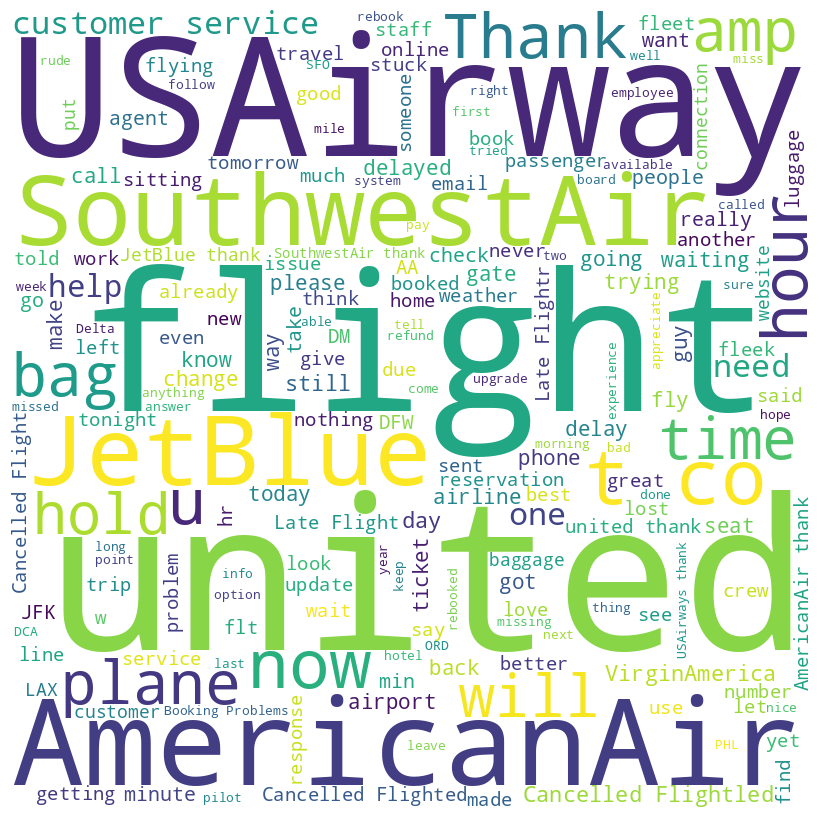

In [71]:
# Creates a new figure for plotting with a specified size.
plt.figure(figsize = (8, 8), facecolor = None)
# Displays the generated word cloud image.
plt.imshow(wordcloud)
# Hides the axes of the plot for a cleaner visualization.
plt.axis("off")
# Adjusts the plot to prevent labels from overlapping.
plt.tight_layout(pad = 0)

# Displays the plot.
plt.show()

### Quiz 1:

Include a word cloud here with the 100 most frequently used terms.

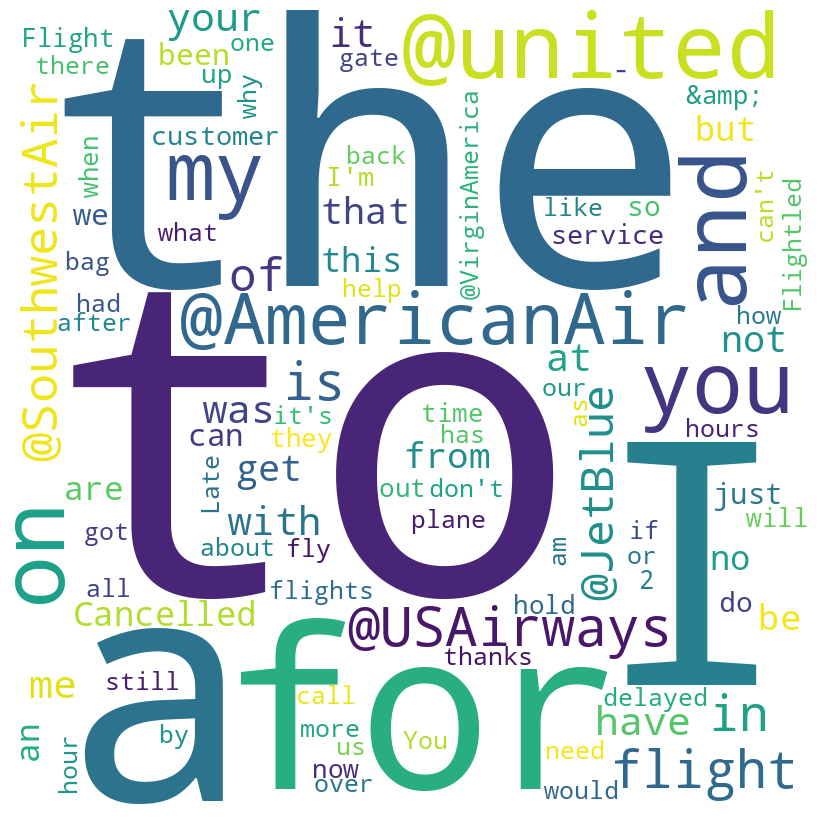

In [86]:
# Insert your code
import pandas as pd
import io
# from google.colab import files # No longer needed
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# uploaded = files.upload() # No longer needed
# data = pd.read_csv(io.StringIO(uploaded['Tweets (1).csv'].decode('utf-8'))) # Original line
data = pd.read_csv('/content/Tweets.csv') # Read directly from the file path
df = data[["text", "airline_sentiment"]].copy()

# Combine all text from the 'text' column
all_text = df["text"].str.cat(sep=' ')

# Generate word frequencies
word_counts = Counter(all_text.split())

# Get the 100 most frequent words
top_100_words = dict(word_counts.most_common(100))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate_from_frequencies(top_100_words)

# Display the generated word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

## TF-IDF

There are some words that are too common in the corpus and are not strictly stopwords. These words differ between datasets, and we must find appropriate ways to identify them.

One of the most common approaches is term frequency inverse document frequency (TF-IDF). This is a weighting scheme that aims to weight words by their appearance in different documents. TF-IDF extends BoW by multiplying the frequency of each term $t_j$ by a weight $w_j$ as follows

$$
\text(TFIDF)(t_i|d_j)=\text{TF}(t_i | d_j) w_i
$$

In this way, we assign a lower weight to terms that are common in different documents and a higher weight to rare terms. There are several ways to calculate $w_i$, the most common approach being the *inverse document frequency* $w_{idf}(t_i)$, which is calculated as follows:

$$
w_{idf}(t_i)=1+\log{\frac{N}{1+df(t_i)}}
$$

Where $N$ is the number of documents in the corpus and $df(t_i)$ is the number of documents containing the term $t_i$.

Now, we can calculate a TF-IDF representation using the `TfidfVectorizer`:

In [89]:
# Initialize TfidfVectorizer and fit it to the 'text' column of the DataFrame
vect = TfidfVectorizer().fit(df["text"])

In [90]:
# Transform the 'text' column of the DataFrame into a TF-IDF representation
X = vect.transform(df["text"])
# Display the TF-IDF representation as a DataFrame
show_bow(
        X.toarray(),
        vect.get_feature_names_out()
        )

,00,000,000114,000419,000ft,000lbs,0011,0016,00a,00am,...,zrh_airport,zsdgzydnde,zsuztnaijq,ztrdwv0n4l,zukes,zurich,zv2pt6trk9,zv6cfpohl5,zvfmxnuelj,zzps5ywve2
d_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_14635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d_14636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d_14637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d_14638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The `TfidfVectorizer` is similar to the `CountVectorizer`, so we can use the same parameters to filter words by frequency:

In [91]:
vect = TfidfVectorizer(
        min_df=0.025,
        max_df=0.9
        ).fit(df["text"])

In [92]:
X = vect.transform(df["text"])
show_bow(
        X.toarray(),
        vect.get_feature_names_out()
        )

,about,after,again,airline,all,am,americanair,amp,an,and,...,was,we,what,when,why,will,with,would,you,your
d_0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.668165,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
d_1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.329040,0.000000
d_2,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
d_3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.431149,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.332355
d_4,0.494872,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.279754,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_14635,0.000000,0.0,0.0,0.0,0.0,0.0,0.293653,0.000000,0.0,0.000000,...,0.0,0.402305,0.000000,0.0,0.0,0.0,0.0,0.0,0.268285,0.000000
d_14636,0.000000,0.0,0.0,0.0,0.0,0.0,0.181266,0.000000,0.0,0.000000,...,0.0,0.248334,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
d_14637,0.000000,0.0,0.0,0.0,0.0,0.0,0.487504,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
d_14638,0.000000,0.0,0.0,0.0,0.0,0.0,0.188272,0.000000,0.0,0.179597,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.344014,0.232585


In addition, we can change the scale of the frequencies using a logarithm (sublinear scaling).

In [93]:
vect = TfidfVectorizer(
        min_df=0.1,
        max_df=0.9,
        sublinear_tf=True
        ).fit(df["text"])

In [94]:
X = vect.transform(df["text"])
show_bow(
        X.toarray(),
        vect.get_feature_names_out()
        )

,americanair,and,can,flight,for,have,in,is,it,jetblue,...,of,on,southwestair,that,the,to,united,usairways,you,your
d_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
d_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.575855,0.500442,0.0,0.0,0.646490,0.000000
d_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000
d_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.506976,0.443447,0.0,0.458820,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.287906,0.0,0.0,0.000000,0.502915
d_4,0.000000,0.447135,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.894467,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_14635,0.492428,0.000000,0.000000,0.466579,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.464909,0.0,0.000000,0.000000,0.348253,0.0,0.0,0.449887,0.000000
d_14636,0.443098,0.000000,0.000000,0.710849,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.546222,0.000000,0.000000,0.0,0.0,0.000000,0.000000
d_14637,0.816454,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.577410,0.0,0.0,0.000000,0.000000
d_14638,0.263634,0.251486,0.329886,0.249795,0.000000,0.328314,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.407809,0.325685


### Quiz 2:

Include a word cloud here with the 100 most frequently used terms.

In [95]:
# Convert the TF-IDF representation to a DataFrame
data_frame_tfidf = show_bow(X.toarray(), vect.get_feature_names_out())

In [96]:
# Calculate the sum of TF-IDF scores for each term across all documents
term_tfidf_sum = data_frame_tfidf.sum(axis=0)

# Get the top 100 terms based on their total TF-IDF score
top_100_tfidf = term_tfidf_sum.sort_values(ascending=False).head(100)

# Convert the top 100 terms and their scores to a dictionary
top_100_tfidf_dict = top_100_tfidf.to_dict()

In [97]:
# Create a WordCloud object using the top 100 TF-IDF terms and their scores
wordcloud_tfidf = WordCloud(width=800, height=800,
                            background_color='white',
                            stopwords=STOPWORDS, # Use the predefined STOPWORDS list
                            min_font_size=10).generate_from_frequencies(top_100_tfidf_dict)

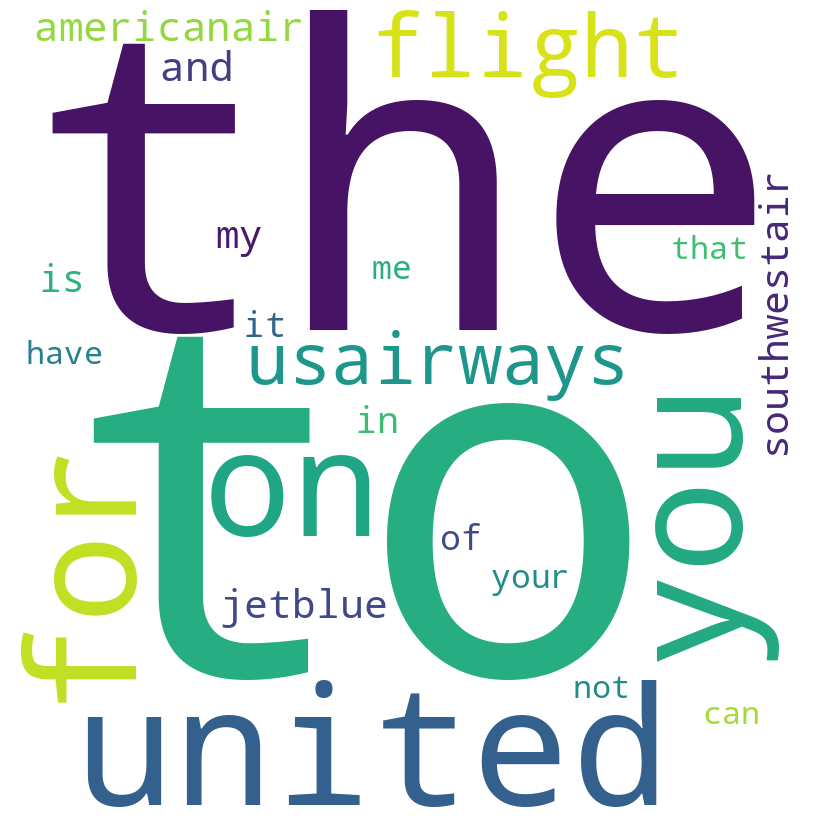

In [98]:
# Display the generated word cloud for TF-IDF
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_tfidf)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

## Bag of N-Gramas

Bag-of-N-Grams (BoN) is a representation that extends the BoW representation. It counts sequences of tokens (usually characters or words) of different lengths. For example, we can construct 3-grams for the following text:

<emph>the little apple</emph>

For this sequence, the possible 3-grams are:

``python
“the”, “th ”, “e l”, “ li”, “lit”, “itt”, “ttl”, “tle”, “le ”, “e a”, “ap”, “app”, ‘ppl’, “ple”
```

We will implement this natively in Python. First, we define the input text.

In [99]:
# Define the input text
text = "the little apple"
# Print the input text
print(text)

the little apple



Now, we must divide the text into sequences of a certain length:

In [100]:
# Define the n-gram size
n = 3
# Generate character n-grams of size n
grams = [
        text[i: i + n]
        for i in range(len(text) - 2)
        ]
# Print the generated n-grams
print(grams)

['the', 'he ', 'e l', ' li', 'lit', 'itt', 'ttl', 'tle', 'le ', 'e a', ' ap', 'app', 'ppl', 'ple']



Therefore, the representation of N-grams is calculated by counting the number of occurrences of each unique sequence of characters. Let's look at an example with a text containing repeated 3-grams:

In [101]:
# Define the input text with repeated n-grams
text = "the man who sold the world to another man"
# Print the input text
print(text)

the man who sold the world to another man


In [102]:
n = 3
grams = [
        text[i: i + n]
        for i in range(len(text) - 2)
        ]
print(grams)

['the', 'he ', 'e m', ' ma', 'man', 'an ', 'n w', ' wh', 'who', 'ho ', 'o s', ' so', 'sol', 'old', 'ld ', 'd t', ' th', 'the', 'he ', 'e w', ' wo', 'wor', 'orl', 'rld', 'ld ', 'd t', ' to', 'to ', 'o a', ' an', 'ano', 'not', 'oth', 'the', 'her', 'er ', 'r m', ' ma', 'man']


In [ ]:
n_grams = Counter(grams)
print(n_grams)

In Python, we have other implementations that are much more efficient and can calculate N-grams for real-world applications. Let's look at the example with the airline sentiment dataset:

In [ ]:
vect = CountVectorizer(
        analyzer="char", # this specifies that We want to work at characters level.
        ngram_range=(3, 3) # this specifies the range of sequences to consider, in this case only 3.
        ).fit(df["text"])

Now, we can determine the representation of the tri-grams:

In [103]:
X = vect.transform(df["text"])
show_bow(X.toarray(), vect.get_feature_names_out())

,americanair,and,can,flight,for,have,in,is,it,jetblue,...,of,on,southwestair,that,the,to,united,usairways,you,your
d_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
d_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.575855,0.500442,0.0,0.0,0.646490,0.000000
d_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000
d_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.506976,0.443447,0.0,0.458820,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.287906,0.0,0.0,0.000000,0.502915
d_4,0.000000,0.447135,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.894467,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_14635,0.492428,0.000000,0.000000,0.466579,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.464909,0.0,0.000000,0.000000,0.348253,0.0,0.0,0.449887,0.000000
d_14636,0.443098,0.000000,0.000000,0.710849,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.546222,0.000000,0.000000,0.0,0.0,0.000000,0.000000
d_14637,0.816454,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.577410,0.0,0.0,0.000000,0.000000
d_14638,0.263634,0.251486,0.329886,0.249795,0.000000,0.328314,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.407809,0.325685


Note that there is a wide range of sequences of size 3. We can filter some of them in a similar way to the BoW representation, i.e., by filtering out terms that are too common or too rare.

In [104]:
vect = CountVectorizer(
        analyzer="char", # this specifies that We want to work at characters level.
        ngram_range=(3, 3), # this specifies the range of sequences to consider, in this case only 3.
        min_df=0.025,
        max_df=0.9
        ).fit(df["text"])

In [105]:
X = vect.transform(df["text"])
show_bow(X.toarray(), vect.get_feature_names_out())

,&a,-,2,a,ab,ac,af,ag,ai,al,...,y m,y o,y s,y t,y w,y.,yed,yin,you,ys
d_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
d_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d_3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
d_4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_14635,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
d_14636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d_14637,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
d_14638,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,3,0


Similarly, we can construct a BoN using sequences of words. For example, let's construct a BoN for sequences of 1, 2, and 3 words:

In [106]:
vect = CountVectorizer(
        analyzer="word", # this specifies that We want to work at characters level.
        ngram_range=(1, 3), # this specifies the range of sequences to consider, in this case only 3.
        min_df=0.010,
        max_df=0.9
        ).fit(df["text"])

In [107]:
X = vect.transform(df["text"])
show_bow(X.toarray(), vect.get_feature_names_out())

,10,30,aa,about,after,again,agent,agents,airline,airlines,...,worst,would,yes,yet,you,you for,you guys,you have,you re,your
d_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
d_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
d_4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_14635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
d_14636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d_14637,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
d_14638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,1,0,1


## Autosuggestions with BoN

This is a typical example based on the probabilistic interpretation of BoN as Markov chains.

The general idea is that we are going to estimate the conditional probability:

$$
P(t_k|t_{k-1}, t_{k-2}, \dots, t_0)
$$

However, using a Markov assumption, we intuitively restrict this conditional probability:

* When we have a first-order Markov chain, the probability $P(t_k|t_{k-1})$ of a single token $t_k$ occurring depends only on the previous token $t_{k-1}$.
* When we have a second-order Markov chain, the probability $P(t_k|t_{k-1}, t_{k-2})$ of occurrence of a single token $t_k$ depends on the last two tokens $t_{k-1}$.

The BoN is related to the previous conditional probability; in fact, a BoN corresponds to the estimation of the joint probability $P(t_k, t_{k-1}, t_{k-2}, \dots)$, which can be used to calculate the conditional probability of a sequence of size $N - 1$:

$$
P(t_k| t_{k-1}, t_{k-2}, \dots) = P(t_k, t_{k-1}, t_{k-2}, \dots)
$$

Let's look at this implementation for auto-suggesting the next character for a specific word:

In [108]:
text = "Once upon a time, there was a child that tried to climb the highest mountain in the world. \"Mark my words, I'll achieve it.\", he said."

vect = CountVectorizer(
        analyzer="char", # this specifies that We want to work at characters level.
        ngram_range=(3, 3) # this specifies the range of sequences to consider, in this case only 3.
        ).fit([text])

In [109]:
X = vect.transform([text])
df2 = show_bow(X.toarray(), vect.get_feature_names_out())
df2

,"""m",a,ac,ch,cl,he,hi,i',in,it,...,the,tim,to,tri,unt,upo,ve,was,wor,y w
d_0,1,2,1,1,1,1,1,1,1,1,...,3,1,1,1,1,1,1,1,2,1


Now, we can divide the sequences

In [112]:
# Convert the DataFrame to a dictionary of counts
counts = df2.to_dict()
counts = {key: val["d_0"] for key, val in counts.items()}
counts

{' "m': 1,
 ' a ': 2,
 ' ac': 1,
 ' ch': 1,
 ' cl': 1,
 ' he': 1,
 ' hi': 1,
 " i'": 1,
 ' in': 1,
 ' it': 1,
 ' mo': 1,
 ' my': 1,
 ' sa': 1,
 ' th': 4,
 ' ti': 1,
 ' to': 1,
 ' tr': 1,
 ' up': 1,
 ' wa': 1,
 ' wo': 2,
 '", ': 1,
 '"ma': 1,
 "'ll": 1,
 ', h': 1,
 ', i': 1,
 ', t': 1,
 '. "': 1,
 '.",': 1,
 'a c': 1,
 'a t': 1,
 'ach': 1,
 'aid': 1,
 'ain': 1,
 'ark': 1,
 'as ': 1,
 'at ': 1,
 'b t': 1,
 'ce ': 1,
 'chi': 2,
 'cli': 1,
 'd t': 2,
 'd. ': 1,
 'ds,': 1,
 'e h': 1,
 'e i': 1,
 'e s': 1,
 'e u': 1,
 'e w': 2,
 'e, ': 1,
 'ed ': 1,
 'ere': 1,
 'est': 1,
 'eve': 1,
 'ghe': 1,
 'hat': 1,
 'he ': 3,
 'her': 1,
 'hes': 1,
 'hie': 1,
 'hig': 1,
 'hil': 1,
 "i'l": 1,
 'id.': 1,
 'ied': 1,
 'iev': 1,
 'igh': 1,
 'ild': 1,
 'imb': 1,
 'ime': 1,
 'in ': 2,
 'it.': 1,
 'k m': 1,
 'l a': 1,
 'ld ': 1,
 'ld.': 1,
 'lim': 1,
 'll ': 1,
 'mar': 1,
 'mb ': 1,
 'me,': 1,
 'mou': 1,
 'my ': 1,
 'n a': 1,
 'n i': 1,
 'n t': 1,
 'nce': 1,
 'nta': 1,
 'o c': 1,
 'on ': 1,
 'onc': 1,
 'ord': 1,

Let's calculate the probabilities:

In [113]:
# Calculate the probabilities of the next character based on the previous two characters
probs = {}
for token, count in counts.items():
    if token[:2] not in probs:
        probs[token[:2]] = [(token[-1], count)]
    else:
        probs[token[:2]].append((token[-1], count))

print(probs)

{' "': [('m', 1)], ' a': [(' ', 2), ('c', 1)], ' c': [('h', 1), ('l', 1)], ' h': [('e', 1), ('i', 1)], ' i': [("'", 1), ('n', 1), ('t', 1)], ' m': [('o', 1), ('y', 1)], ' s': [('a', 1)], ' t': [('h', 4), ('i', 1), ('o', 1), ('r', 1)], ' u': [('p', 1)], ' w': [('a', 1), ('o', 2)], '",': [(' ', 1)], '"m': [('a', 1)], "'l": [('l', 1)], ', ': [('h', 1), ('i', 1), ('t', 1)], '. ': [('"', 1)], '."': [(',', 1)], 'a ': [('c', 1), ('t', 1)], 'ac': [('h', 1)], 'ai': [('d', 1), ('n', 1)], 'ar': [('k', 1)], 'as': [(' ', 1)], 'at': [(' ', 1)], 'b ': [('t', 1)], 'ce': [(' ', 1)], 'ch': [('i', 2)], 'cl': [('i', 1)], 'd ': [('t', 2)], 'd.': [(' ', 1)], 'ds': [(',', 1)], 'e ': [('h', 1), ('i', 1), ('s', 1), ('u', 1), ('w', 2)], 'e,': [(' ', 1)], 'ed': [(' ', 1)], 'er': [('e', 1)], 'es': [('t', 1)], 'ev': [('e', 1)], 'gh': [('e', 1)], 'ha': [('t', 1)], 'he': [(' ', 3), ('r', 1), ('s', 1)], 'hi': [('e', 1), ('g', 1), ('l', 1)], "i'": [('l', 1)], 'id': [('.', 1)], 'ie': [('d', 1), ('v', 1)], 'ig': [('h', 

Let's look at some examples:

In [114]:
def complete_word(word):
    seq = word[-2:]
    seq_probs = sorted(
            probs[seq],
            key=lambda x: x[1],
            reverse=True
            )
    print(seq_probs[0][0])

In [115]:
complete_word("Onc")

e


In [116]:
complete_word("Upo")

n


In [117]:
complete_word("tim")

b


In [118]:
complete_word("tha")

t


In [119]:
complete_word("word")

s


## Document retrieval

One of the most common uses of TF-IDF is information retrieval. A TF-IDF representation can be used to determine the similarity between different documents.

Let's look at an example:

In [ ]:
vect = TfidfVectorizer(
        sublinear_tf=True,
        min_df=0.025,
        max_df=0.9
        ).fit(df["text"])

In [ ]:
X = vect.transform(df["text"]).toarray()
show_bow(X, vect.get_feature_names_out())

We can calculate the most relevant documents in this way:

In [ ]:
query = "there has been a delay since yesterday"
q_repr = vect.transform([query]).toarray()
print(q_repr)

In this case, we use cosine similarity to determine the similarity of each document to the query:

In [ ]:
sims = cosine_similarity(X, q_repr).flatten()
sims.shape

Finally, let's sort the documents in the corpus by similarity and display the five most similar ones.

In [ ]:
df["similarity"] = sims

for document in df.sort_values(
        by="similarity",
        ascending=False
        ).iloc[:5, 0]:
    print(document)